In [21]:
import pandas as pd
data = pd.read_csv("train.csv", sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

#### Handle duplicates

In [22]:
data.drop_duplicates(inplace=True)

#### Handle missing values

In [23]:
data.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

#### Handle outliers

In [24]:
numeric_data = data.select_dtypes(exclude='object')
numeric_data.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


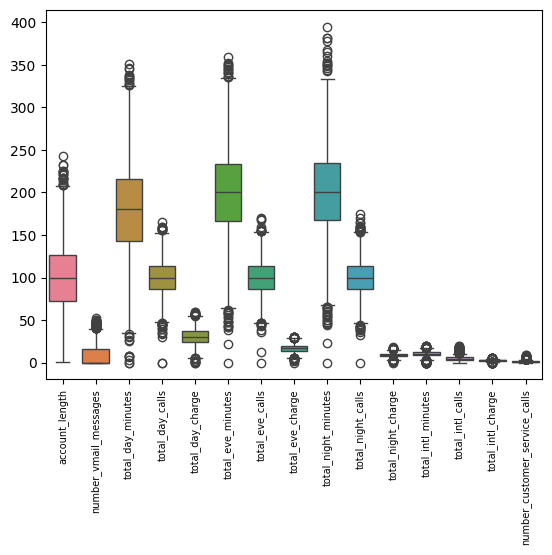

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=numeric_data)
ax = plt.gca()
ax.tick_params(axis='x', labelsize=7, rotation=90)
plt.show()

In [26]:
col1 = ['account_length', 'number_vmail_messages', 'total_intl_calls', 'number_customer_service_calls']
col2 = numeric_data.columns.difference(col1)
data[col1] = data[col1].clip(upper=data[col1].quantile(0.95),axis=1)
data[col2] = data[col2].apply(lambda x: x.clip(x.quantile(0.05), x.quantile(0.99)))

In [27]:
numeric_data = data.select_dtypes(exclude='object')
numeric_data.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,99.377176,37.871599,1.0000,73.0000,100.00,127.0000,167.0000
number_vmail_messages,4250.0,7.403765,12.886429,0.0000,0.0000,0.00,16.0000,36.0000
total_day_minutes,4250.0,181.245208,51.192435,91.5900,143.3250,180.45,216.2000,304.8550
total_day_calls,4250.0,100.291984,18.765574,67.0000,87.0000,100.00,113.0000,145.5100
total_day_charge,4250.0,30.812365,8.702457,15.5735,24.3650,30.68,36.7500,51.8259
total_eve_minutes,4250.0,201.173081,47.467475,118.2000,165.9250,200.70,233.7750,318.6510
total_eve_calls,4250.0,100.516471,18.908018,67.0000,87.0000,100.00,114.0000,147.0000
total_eve_charge,4250.0,17.100061,4.034499,10.0500,14.1025,17.06,19.8675,27.0851
total_night_minutes,4250.0,201.412879,47.464833,118.0900,167.2250,200.45,234.7000,317.5550
total_night_calls,4250.0,100.168454,19.056036,67.0000,86.0000,100.00,113.0000,147.5100


#### Transform the categorial data into numerical data

In [29]:
data['churn'] = data['churn'].replace({'yes':1, 'no':0})
data = data.drop(['state','area_code'], axis=1)
data['international_plan'] = data['churn'].replace({'yes':1, 'no':0})
data['voice_mail_plan'] = data['voice_mail_plan'].replace({'yes':1, 'no':0})

data['total_charges'] = data['total_intl_charge'] + data['total_night_charge'] + data['total_day_charge'] + data['total_eve_charge']
data['total_calls'] = data['total_eve_calls'] + data['total_day_calls'] + data['total_intl_calls'] + data['total_night_calls']
data['total_minutes'] = data['total_day_minutes'] + data['total_night_minutes'] + data['total_eve_minutes'] + data['total_intl_minutes']
data.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_charges,total_calls,total_minutes
0,107,0,1,26,161.6,123.0,27.47,195.500,103,16.6200,...,103.0,11.45,13.7,3,3.70,1,0,59.2400,332.0,625.200
1,137,0,0,0,243.4,114.0,41.38,121.200,110,10.3000,...,104.0,7.32,12.2,5,3.29,0,0,62.2900,333.0,539.400
2,84,0,0,0,299.4,71.0,50.90,118.200,88,10.0500,...,89.0,8.86,6.6,7,1.78,2,0,71.5900,255.0,621.100
3,75,0,0,0,166.7,113.0,28.34,148.300,122,12.6100,...,121.0,8.41,10.1,3,2.73,3,0,52.0900,359.0,512.000
4,121,0,1,24,218.2,88.0,37.09,318.651,108,27.0851,...,118.0,9.57,7.5,7,2.03,3,0,75.7751,321.0,756.951


#### Correlation Analysis

<Axes: >

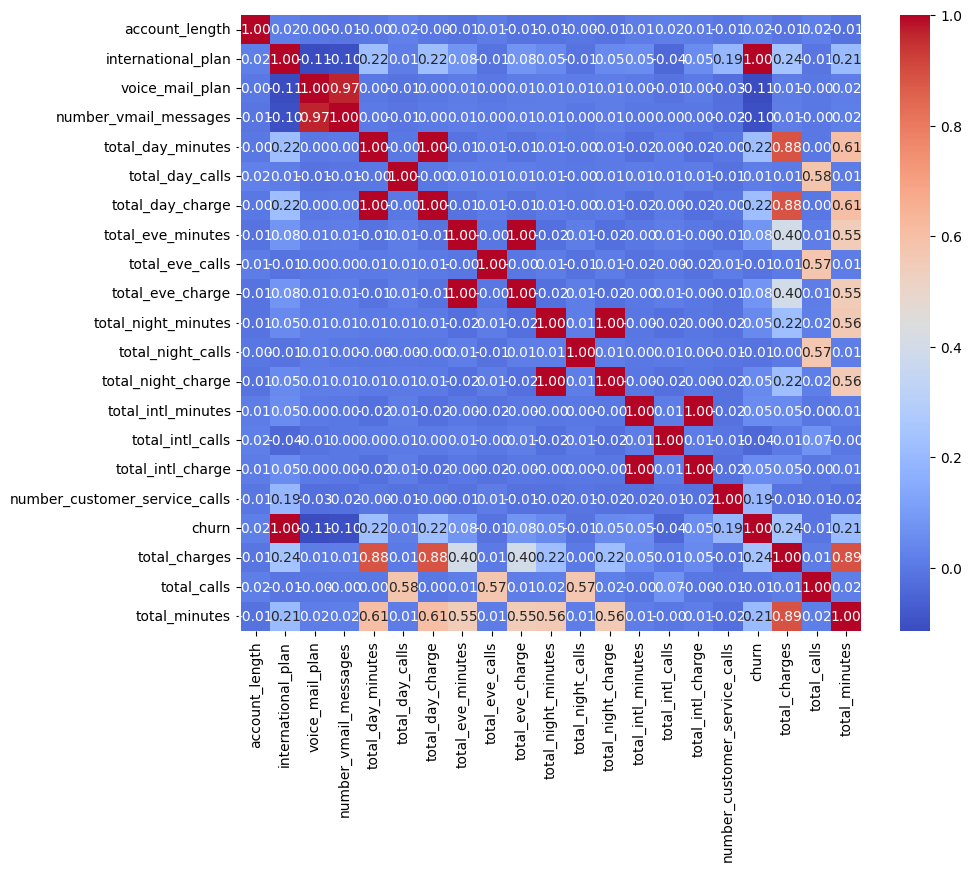

In [30]:
plt.figure(figsize=(10,8))
numeric_data = data.select_dtypes(exclude='object')
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [31]:
data = data.drop('voice_mail_plan',axis=1)
data.head()

,account_length,international_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_charges,total_calls,total_minutes
0,107,0,26,161.6,123.0,27.47,195.500,103,16.6200,254.4,103.0,11.45,13.7,3,3.70,1,0,59.2400,332.0,625.200
1,137,0,0,243.4,114.0,41.38,121.200,110,10.3000,162.6,104.0,7.32,12.2,5,3.29,0,0,62.2900,333.0,539.400
2,84,0,0,299.4,71.0,50.90,118.200,88,10.0500,196.9,89.0,8.86,6.6,7,1.78,2,0,71.5900,255.0,621.100
3,75,0,0,166.7,113.0,28.34,148.300,122,12.6100,186.9,121.0,8.41,10.1,3,2.73,3,0,52.0900,359.0,512.000
4,121,0,24,218.2,88.0,37.09,318.651,108,27.0851,212.6,118.0,9.57,7.5,7,2.03,3,0,75.7751,321.0,756.951


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   int64  
 2   number_vmail_messages          4250 non-null   int64  
 3   total_day_minutes              4250 non-null   float64
 4   total_day_calls                4250 non-null   float64
 5   total_day_charge               4250 non-null   float64
 6   total_eve_minutes              4250 non-null   float64
 7   total_eve_calls                4250 non-null   int64  
 8   total_eve_charge               4250 non-null   float64
 9   total_night_minutes            4250 non-null   float64
 10  total_night_calls              4250 non-null   float64
 11  total_night_charge             4250 non-null   float64
 12  total_intl_minutes             4250 non-null   f

In [33]:
data.to_csv('Train1.0.csv')

#### Handle Test dataset

In [35]:
test_data = pd.read_csv("test.csv", sep=',')

test_data['total_charges'] = test_data['total_intl_charge'] + test_data['total_night_charge'] +test_data['total_day_charge'] + test_data['total_eve_charge']
test_data['total_calls'] = test_data['total_eve_calls'] + test_data['total_day_calls'] + test_data['total_intl_calls'] + test_data['total_night_calls']
test_data['total_minutes'] = test_data['total_day_minutes'] + test_data['total_night_minutes'] + test_data['total_eve_minutes'] + test_data['total_intl_minutes']

test_data = test_data.drop('voice_mail_plan',axis=1)
test_data = test_data.drop(['area_code', 'state'], axis=1)

test_data.to_csv('Test1.0.csv')